In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Merging all the CSV Files

In [6]:

folder = "/Users/niwasthakur/Downloads/New Folder With Items/Sales_Data"

files = [
    "Sales_April_2019.csv", "Sales_May_2019.csv", "Sales_June_2019.csv",
    "Sales_July_2019.csv", "Sales_August_2019.csv", "Sales_September_2019.csv",
    "Sales_October_2019.csv", "Sales_November_2019.csv", "Sales_December_2019.csv",
    "Sales_January_2019.csv", "Sales_February_2019.csv", "Sales_March_2019.csv"
]

[print(f) for f in files]
all_data = pd.concat([pd.read_csv(os.path.join(folder, f)) for f in files])

all_data.to_csv(os.path.join(folder, "all_data.csv"), index=False)


Sales_April_2019.csv
Sales_May_2019.csv
Sales_June_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv
Sales_September_2019.csv
Sales_October_2019.csv
Sales_November_2019.csv
Sales_December_2019.csv
Sales_January_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv


In [7]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### Clean up the data

In [9]:
nan_data = all_data[all_data.isna().any(axis = 1)]
nan_data = all_data.dropna(how = 'all')
nan_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


### Find 'Or' and delete it

In [11]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data = all_data.dropna(how='all')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns

### Task 2 : Add Month column

In [14]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months'] = all_data['Months'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Convert columns to the correct type

In [16]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = all_data['Price Each'].astype(float)

### Add a Sales Column

In [18]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [46]:
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].split(' ')[1].strip()

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head(12)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14,5


### Question 1 : What was the Best Month for sales ? how much was earned in that month

In [21]:
month_sales = all_data.groupby('Months')[['Months', 'Quantity Ordered', 'Price Each', 'Sales']].sum()
month_sales

,Months,Quantity Ordered,Price Each,Sales
Months,,,,
1,9709,10903,1811768.38,1822256.73
2,23950,13449,2188884.72,2202022.42
3,45459,17005,2791207.83,2807100.38
4,73116,20558,3367671.02,3390670.24
5,82830,18667,3135125.13,3152606.75
6,81324,15253,2562025.61,2577802.26
7,100051,16072,2632539.56,2647775.76
8,95688,13448,2230345.42,2244467.88
9,104589,13109,2084992.09,2097560.13


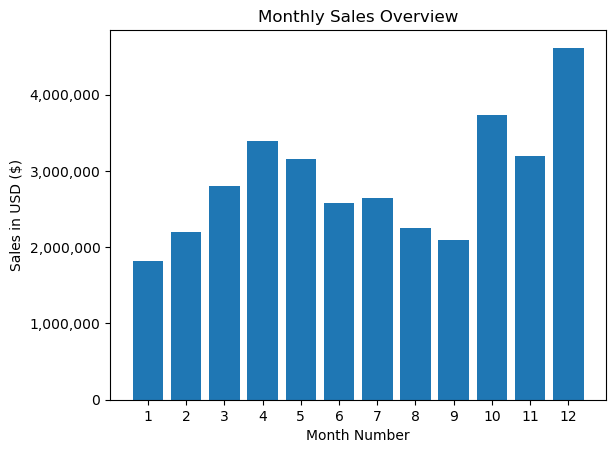

In [48]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_to_int(x, pos):
    return f'{int(x):,}'

Months = range(1, 13)

plt.bar(Months, month_sales['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.title('Monthly Sales Overview')
plt.xticks(Months)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_int))
plt.show()

### Question 2 : Which city had the highest number of sales ?

In [50]:
city_sales = all_data.groupby('City')[['Quantity Ordered', 'Price Each', 'Months', 'Sales']].sum()
city_sales

,Quantity Ordered,Price Each,Months,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


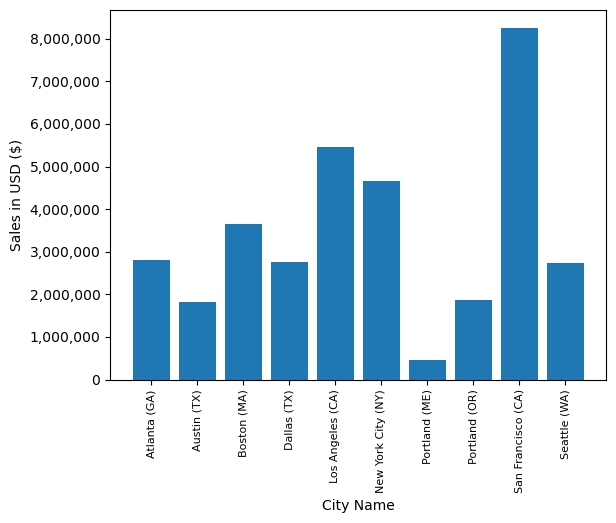

In [52]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, city_sales['Sales'])
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_to_int))

### Question 3 : What time should we display advertisements to maximize likelihood of customer's buying product

In [54]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [56]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",3,14.95,San Francisco (CA),11,14
15222,176555,27in FHD Monitor,1,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",3,149.99,San Francisco (CA),20,27
15223,176556,AAA Batteries (4-pack),3,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",3,8.97,Los Angeles (CA),10,29
15224,176557,iPhone,1,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",3,700.00,San Francisco (CA),12,32


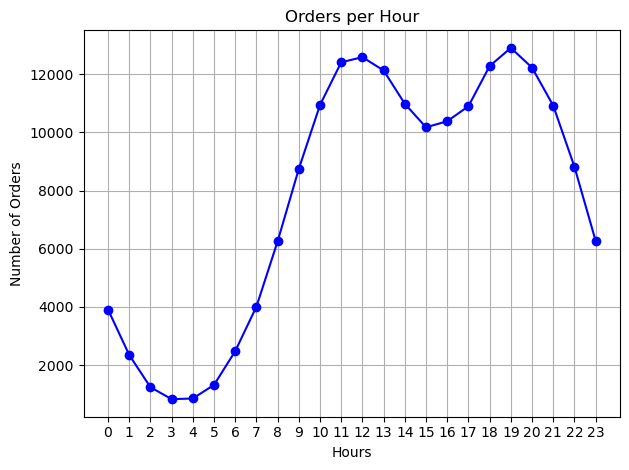

In [58]:
hourly_data = all_data.groupby('Hour').size() 

Hours = hourly_data.index
order_counts = hourly_data.values

plt.plot(Hours, order_counts, marker='o', color='b')
plt.xticks(Hours) 
plt.ylabel('Number of Orders')
plt.xlabel('Hours')
plt.title('Orders per Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 4 : What products are most often sold together ?

In [31]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [60]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    products = row.split(',')
    count.update(Counter(combinations(products, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

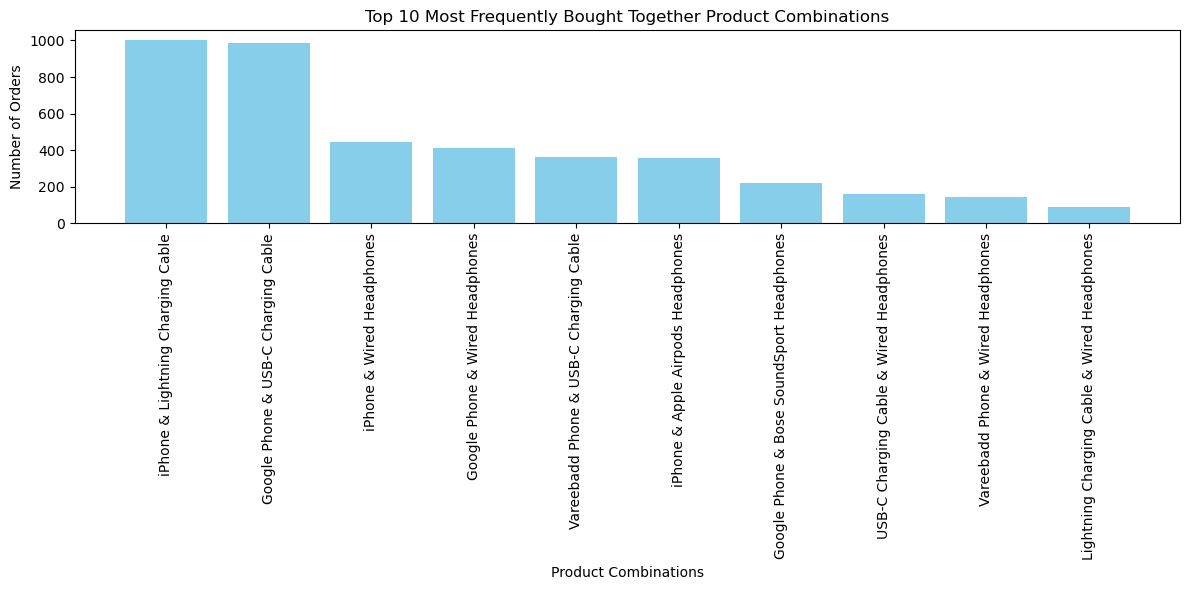

In [62]:
import matplotlib.pyplot as plt

most_common_combos = count.most_common(10)
combos = [' & '.join(combo) for combo, count in most_common_combos]
counts = [count for combo, count in most_common_combos]

plt.figure(figsize=(12, 6))
plt.bar(combos, counts, color='skyblue')
plt.xticks(rotation='vertical', fontsize=10)
plt.ylabel('Number of Orders')
plt.xlabel('Product Combinations')
plt.title('Top 10 Most Frequently Bought Together Product Combinations')
plt.tight_layout()
plt.show()

### Question 5 : What product sold the most ? Why do you think it sold the most ?

In [64]:
product_group = all_data.groupby('Product')[['Quantity Ordered', 'Price Each', 'Months', 'Sales', 'Hour', 'Minute',]].sum()
product_group

,Quantity Ordered,Price Each,Months,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


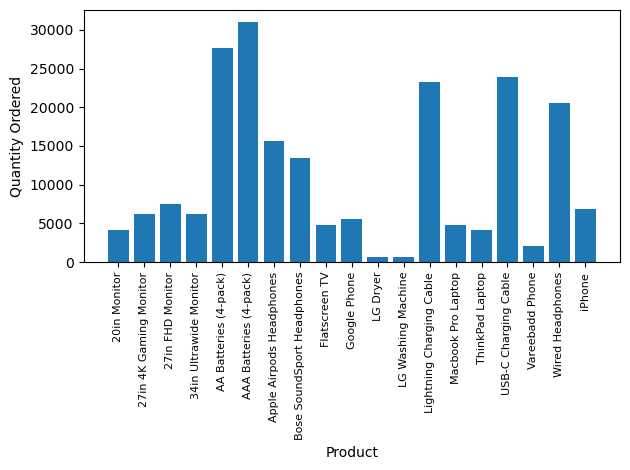

In [66]:
import matplotlib.pyplot as plt

product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.tight_layout()
plt.show()

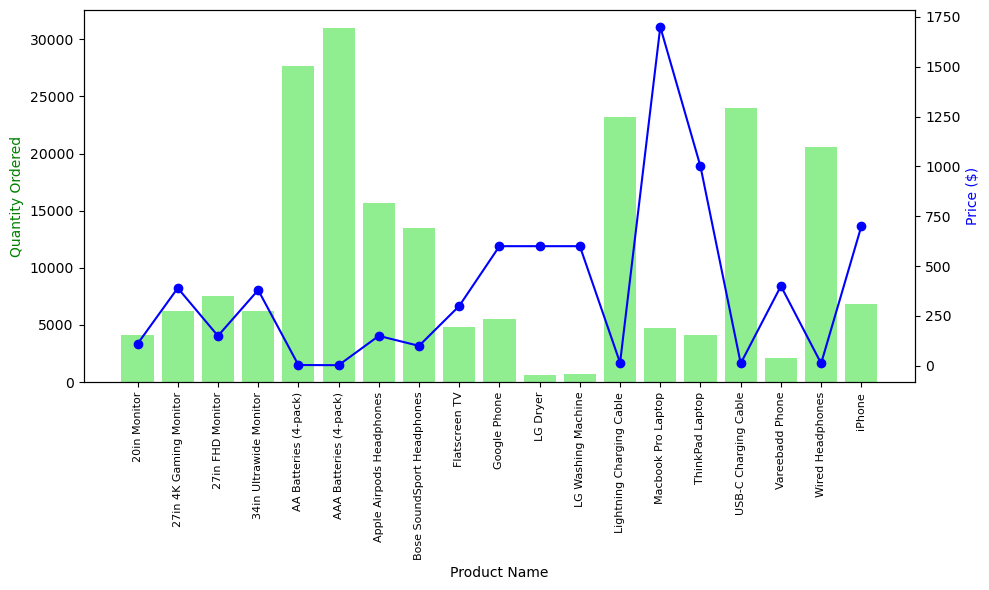

In [68]:
prices = all_data.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='lightgreen')
ax2.plot(products, prices, 'b-', marker='o')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', fontsize=8)

plt.tight_layout()
plt.show()